<a href="https://colab.research.google.com/github/SahajTC/Augmented-Financial-Intelligence/blob/main/exponential_smoothening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import datetime


In [25]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
import yfinance as yf
btc=yf.download(tickers='BTC-USD', start='2020-01-01', end='2022-11-30', interval = '1d')#bitcoin
eth=yf.download(tickers='ETH-USD', start='2020-01-01', end='2022-11-30', interval = '1d')#etherum
bnb=yf.download(tickers='BNB-USD', start='2020-01-01', end='2022-11-30', interval = '1d')#binance

doge=yf.download(tickers='DOGE-USD', start='2020-01-01', end='2022-11-30', interval = '1d')#dogecoin
dot=yf.download(tickers='DOT-USD', start='2020-01-01', end='2022-11-30', interval = '1d')#polkadot
atom=yf.download(tickers='ATOM-USD', start='2020-01-01', end='2022-11-30', interval = '1d')#cosmos

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [27]:
def mod_train(df):
  #Split Train Test
  import math
  total_size=len(df)
  split = 10392 / 11856
  train_size=math.floor(split*total_size)
  train=df.head(train_size)
  test=df.tail(len(df) -train_size)
  from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
  # Create prediction table
  y_hat = test.copy()
  fit2 = SimpleExpSmoothing(np.asarray(train['Close'])).fit(smoothing_level=0.6,optimized=False)
  y_hat['SES'] = fit2.forecast(len(test))
  #Plotting data
  plt.figure(figsize=(12,8))
  plt.plot(train.index, train['Close'], label='Train')
  plt.plot(test.index,test['Close'], label='Test')
  plt.plot(y_hat.index,y_hat['SES'], label='SES')
  plt.legend(loc='best')
  plt.title("Simple Exponential Smoothing (SES)")
  plt.show()
  from sklearn.metrics import mean_absolute_percentage_error
  mape = mean_absolute_percentage_error(test.Close, y_hat.SES)
  print('MAPE = '+str(mape))

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


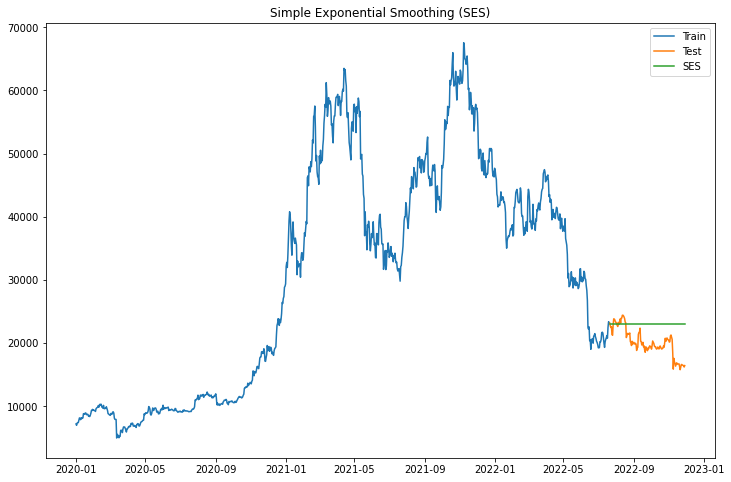

MAPE = 0.1660025612824131


In [28]:
mod_train(btc)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


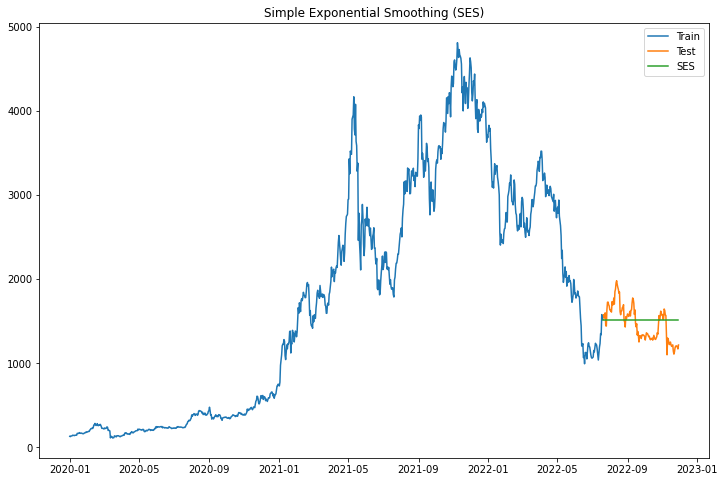

MAPE = 0.12867053458884598


In [29]:
mod_train(eth)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


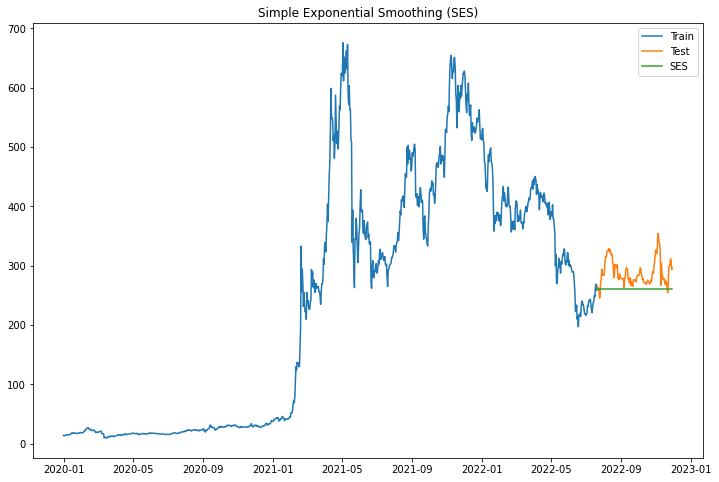

MAPE = 0.09347067479247363


In [30]:
mod_train(bnb)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


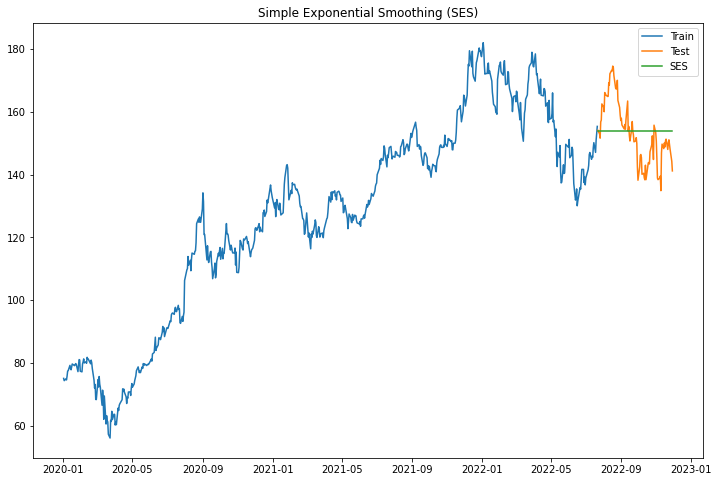

MAPE = 0.05339588056315758


In [31]:
mod_train(aapl)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


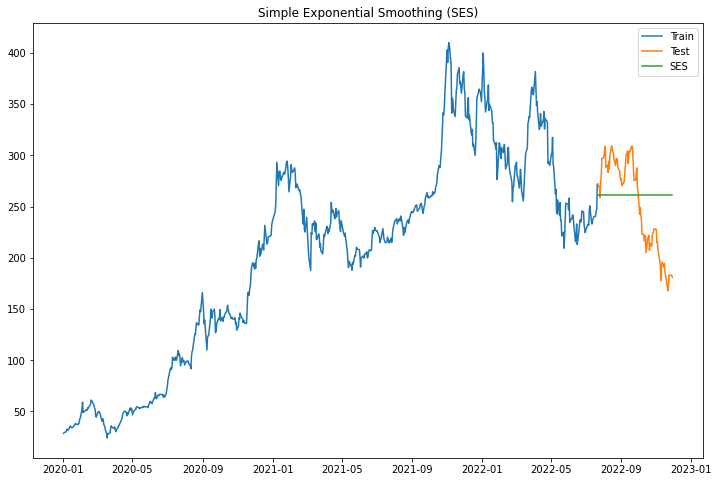

MAPE = 0.1753248465590618


In [32]:
mod_train(tsla)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


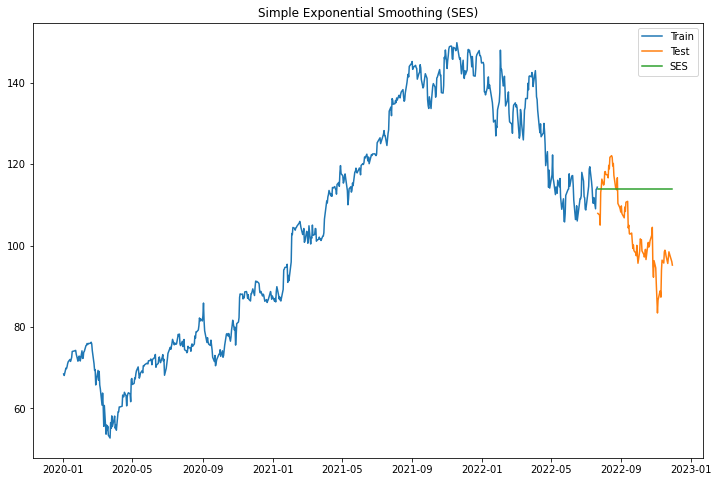

MAPE = 0.11917835654480681


In [33]:
mod_train(googl)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


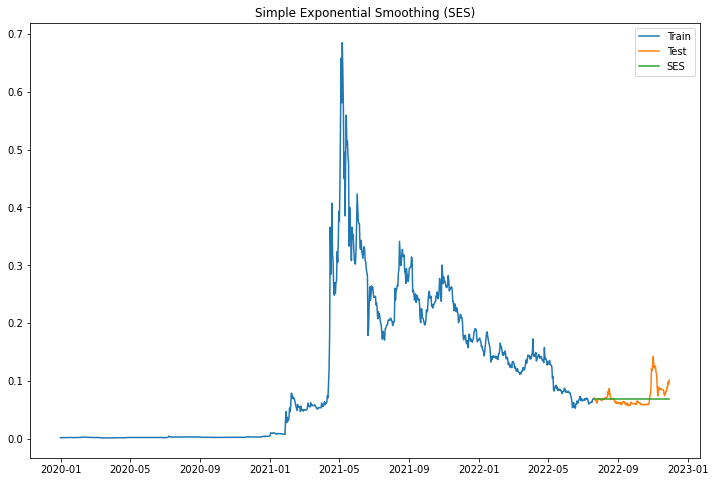

MAPE = 0.1392739631976384


In [34]:
mod_train(doge)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


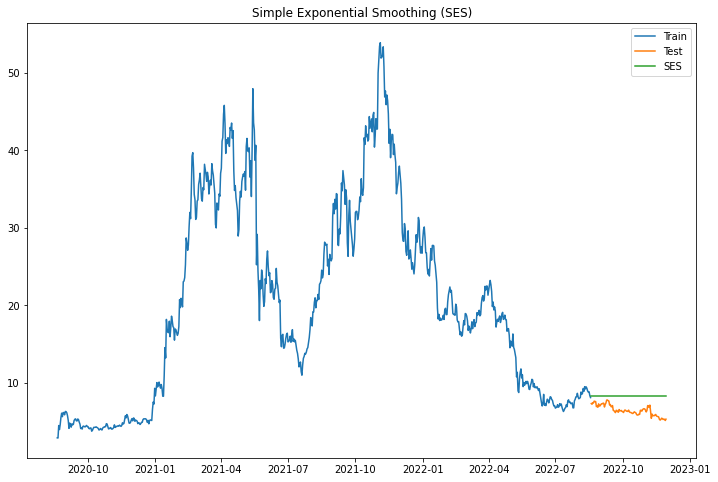

MAPE = 0.29833931491781607


In [35]:
mod_train(dot)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


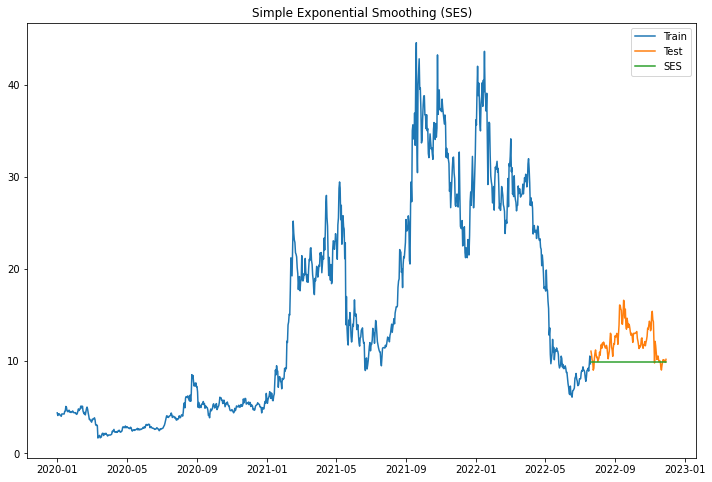

MAPE = 0.17641251609713765


In [36]:
mod_train(atom)